### These two lines tell Python that our program needs two modules. The first, tkinter, is the standard binding to Tk. When imported, it loads the Tk library on your system. The second, ttk, is a submodule of tkinter. It implements Python's binding to the newer "themed widgets" that were added to Tk in 8.5.

- Notice that we've imported everything (*) from the tkinter module. That way, we can call tkinter functions, etc., without prefixing them with the module name. This is standard Tkinter practice.

- However, because we've imported just ttk itself, we'll need to prefix anything inside that submodule. For example, calling Entry(...) would refer to the Entry class inside the tkinter module (classic widgets). We'd need ttk.Entry(...) to use the Entry class inside ttk (themed widgets).

- As you'll see, several classes are defined in both modules. Sometimes you will need one or the other, depending on the context. Explicitly requiring the ttk prefix facilitates this and will be the style used in this tutorial.

In [1]:
from tkinter import *
from tkinter import ttk

### Performing the Calculation
- Here we define our calculate procedure. It's called when a user presses the Calculate button or hits the Return key. It performs the feet to meters calculation.

- As you can clearly see, this routine takes the number of feet from our entry widget, does the calculation, and places the result in our label widget.

- Say what? It doesn't look like we're doing anything with those widgets! Here's where the magic textvariable (cell 24) options we specified when creating the widgets come into play. We specified the global variable feet as the textvariable for the entry. Whenever the entry changes, Tk will automatically update the global variable feet. Similarly, if we explicitly change the value of a textvariable associated with a widget (as we're doing for meters which is attached to our label), the widget will automatically be updated with the current contents of the variable. For Python, the only caveat is that these variables must be an instance of the StringVar class. Slick.

-- The multiplying and dividing by 10000.0 is to avoid the rounding problems inherent in floating-point math. A simple calculation, e.g., 0.3048*1.5, could result in a number like 0.45720000000000005, which would neither be correct or visually appealing when displayed. There are other ways to do this. of course.


In [2]:
def calculate(*args):
    try:
        value = float(feet.get())
        meters.set(int(0.3048 * value * 10000 + 0.5)/ 10000.0)
    except ValueError:
        pass

### Next, the following code sets up the main application window, giving it the title "Feet to Meters."

- Yes, the calculate function appeared before this. We'll describe it below but need to include it near the start because we reference it in other parts of the program.

In [3]:
root=Tk()
root.title('Feet to Meters')

''

### Creating a Content Frame
- Next, we create a frame widget, which will hold the contents of our user interface.

- After the frame is created, grid places it directly inside our main application window. The columnconfigure/rowconfigure bits tell Tk that the frame should expand to fill any extra space if the window is resized.

### upgrade

- Why do we put a frame inside the main window? Strictly speaking, we could just put the other widgets in our interface directly into the main application window without the intervening content frame. That's what you'll see in older Tk programs.

- However, the main window isn't itself part of the newer "themed" widgets. Its background color doesn't match the themed widgets we will put inside it. Using a "themed" frame widget to hold the content ensures that the background is correct. This is illustrated below:

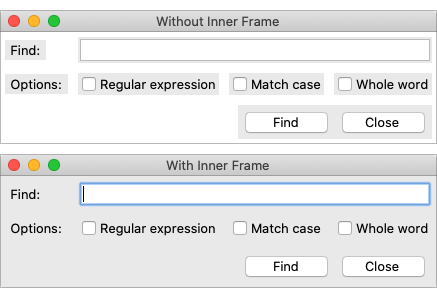

- On macOS, where this problem is most prominent, you can also set the window's background color (via its background configuration option) to the predefined color systemWindowHeaderBackground.



In [4]:
mainframe = ttk.Frame(root, padding = '3 3 12 12')
mainframe.grid(column= 0, row=0, sticky=(N,W,E,S))
root.columnconfigure(0, weight=1)
root.rowconfigure(0, weight=1)

### Creating the Entry Widget
- The first widget we'll create is the entry to input the number of feet to convert.

- We need to do two things: create the widget itself and then place it onscreen.

- When we create a widget, we need to specify its parent. That is the widget that the new widget will be placed inside. In this case, we want our entry placed inside the content frame. Our entry, and other widgets we'll create shortly, are said to be children of the content frame. In Tcl and Perl, the widget name is used to specify the parent-child relationship, i.e. .c.feet is a child of .c. In Python and Ruby, the parent is passed as the first parameter when instantiating a widget object.

- When we create a widget, we can optionally provide it with certain configuration options. Here, we specify how wide we want the entry to appear, i.e., 7 characters. We also assign it a mysterious textvariable; we'll see what that does shortly.

- When widgets are created, they don't automatically appear on the screen; Tk doesn't know where you want them placed relative to other widgets. That's what the grid part does. Remember the layout grid when we sketched out our application? Widgets are placed in the appropriate column (1, 2, or 3) and row (also 1, 2, or 3).

- The sticky option to grid describes how the widget should line up within the grid cell, using compass directions. So w (west) means to anchor the widget to the left side of the cell, we (west-east) means to attach it to both the left and right sides, and so on. Python also defines constants for these directional strings, which you can provide as a list, e.g. W or (W, E).



In [5]:
feet = StringVar()
feet_entry = ttk.Entry(mainframe, width=7, textvariable=feet)
feet_entry.grid(column=2, row=1, sticky=(W,E))

### Creating the Remaining Widgets

- We then do exactly the same thing for the remaining widgets. We have one label that will display the resulting number of meters that we calculate. We have a "Calculate" button that is pressed to perform the calculation. Finally, we have three static text labels to make it clear how to use the application. For each of these widgets, we first create it and then place it onscreen in the appropriate cell in the grid.



In [6]:
meters = StringVar()
ttk.Label(mainframe, textvariable=meters).grid(column=2, row=2, sticky=(W, E))

ttk.Button(mainframe,text='Calculate', command=calculate).grid(column=3, row=3, sticky=W)

ttk.Label(mainframe, text='feet').grid(column=3, row=1, sticky= W)
ttk.Label(mainframe, text='is equivalent to').grid(column=1, row=2, sticky=E)
ttk.Label(mainframe, text='meters').grid(column=3, row=2, sticky=W)

### Adding Some Polish
- We then put a few finishing touches on our user interface.

- The first part walks through all of the widgets contained within our content frame and adds a little bit of padding around each so they aren't so scrunched together. (We could have added these options to each grid call when we first put the widgets onscreen, but this is a nice shortcut.)

- The second part tells Tk to put the focus on our entry widget. That way, the cursor will start in that field, so users don't have to click on it before starting to type.

- The third line tells Tk that if a user presses the Return key (Enter on Windows), it should call our calculate routine, the same as if they pressed the Calculate button.




In [7]:
for child in mainframe.winfo_children():
    child.grid_configure(padx=5, pady=5)

feet_entry.focus()
root.bind('<Return>', calculate)


'140481758687616calculate'

### Start the Event Loop
- Finally, we need to tell Tk to enter its event loop, which is necessary for everything to appear onscreen and allow users to interact with it.



In [8]:
root.mainloop()

### What's Missing
- We've now seen how to create widgets, put them onscreen, and respond to users interacting with them. It's certainly not fancy, could probably do with some error checking, but it's a fully functional GUI application.

##### It's also worth examining what we didn't have to include in our Tk program to make it work. For example:

- we didn't have to worry about redrawing the screen as things changed
- we didn't have to worry about parsing and dispatching events, hit detection, or handling events on each widget
- we didn't have to provide a lot of options when we created widgets; the defaults seemed to take care of most things, and so we only had to change things like the text the button displayed
- we didn't have to write complex code to get and set the values of simple widgets; we just attached them to variables
- we didn't have to worry about what happens when users close the window or resizes it
- we didn't need to write extra code to get this all to work cross-platform


### One More Thing...
- As this tutorial emphasizes Tkinter, our examples use standalone script code, global variables, and simple functions. In practice, you'll likely organize anything beyond the simplest scripts in functions or classes. There are different ways to do this: using modules, creating classes for different parts of the user interface, inheriting from Tkinter classes, etc.

- Often though, you just want to do something simple to encapsulate your data rather than putting everything into the global variable space. Here is the feet to meters example, rewritten to encapsulate the main code into a class. Note the use of self on callbacks (which execute at the global scope) and StringVar's.

In [9]:
class FeetToMeters:

    def __init__(self, root):

        root.title("Feet to Meters")

        mainframe = ttk.Frame(root, padding="3 3 12 12")
        mainframe.grid(column=0, row=0, sticky=(N, W, E, S))
        root.columnconfigure(0, weight=1)
        root.rowconfigure(0, weight=1)
       
        self.feet = StringVar()
        feet_entry = ttk.Entry(mainframe, width=7, textvariable=self.feet)
        feet_entry.grid(column=2, row=1, sticky=(W, E))
        self.meters = StringVar()

        ttk.Label(mainframe, textvariable=self.meters).grid(column=2, row=2, sticky=(W, E))
        ttk.Button(mainframe, text="Calculate", command=self.calculate).grid(column=3, row=3, sticky=W)

        ttk.Label(mainframe, text="feet").grid(column=3, row=1, sticky=W)
        ttk.Label(mainframe, text="is equivalent to").grid(column=1, row=2, sticky=E)
        ttk.Label(mainframe, text="meters").grid(column=3, row=2, sticky=W)

        for child in mainframe.winfo_children(): 
            child.grid_configure(padx=5, pady=5)

        feet_entry.focus()
        root.bind("<Return>", self.calculate)
        
    def calculate(self, *args):
        try:
            value = float(self.feet.get())
            self.meters.set(int(0.3048 * value * 10000.0 + 0.5)/10000.0)
        except ValueError:
            pass

root = Tk()
FeetToMeters(root)
root.mainloop()